<a href="https://colab.research.google.com/github/sami10644/Computer_Vision/blob/main/TransferLearning_with_vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls '/content/drive'


MyDrive


In [9]:
#Give dataset path
train_path = '/content/drive/MyDrive/skincancerdataset/train'
test_path = '/content/drive/MyDrive/skincancerdataset/test'

Working with 1440 images
Image examples: 
1498.jpg


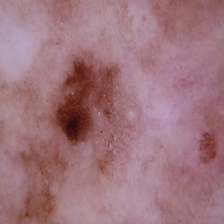

150.jpg


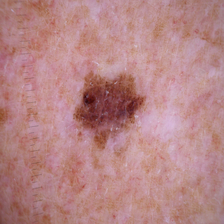

1500.jpg


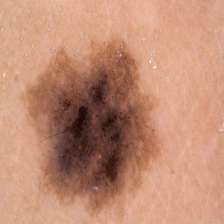

1501.jpg


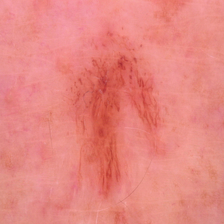

1503.jpg


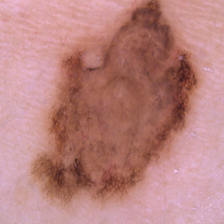

1504.jpg


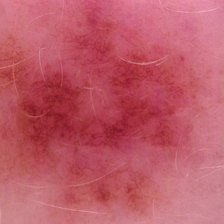

1505.jpg


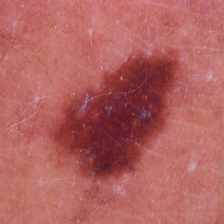

1506.jpg


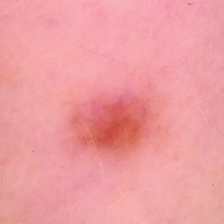

1507.jpg


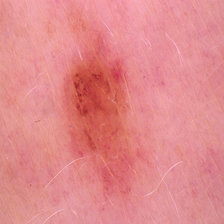

1508.jpg


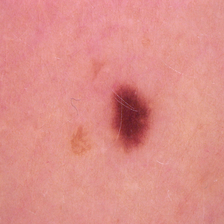

In [10]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/benign'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [11]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [12]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [13]:
for layer in vgg.layers:
  layer.trainable = False

In [14]:
folders = glob('/content/drive/MyDrive/skincancerdataset/train/*')
print(len(folders))

2


In [15]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [18]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [19]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2637 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 296 images belonging to 2 classes.


In [21]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10



Epoch 1: val_loss improved from inf to 1.73890, saving model to mymodel.h5
5/5 - 209s - loss: 1.9661 - accuracy: 0.6750 - val_loss: 1.7389 - val_accuracy: 0.8041 - 209s/epoch - 42s/step
Epoch 2/10


5/5 - 35s - loss: 1.5259 - accuracy: 0.8125 - 35s/epoch - 7s/step
Epoch 3/10


5/5 - 31s - loss: 1.4268 - accuracy: 0.8375 - 31s/epoch - 6s/step
Epoch 4/10


5/5 - 26s - loss: 1.8662 - accuracy: 0.8188 - 26s/epoch - 5s/step
Epoch 5/10


5/5 - 25s - loss: 1.9892 - accuracy: 0.8313 - 25s/epoch - 5s/step
Epoch 6/10


5/5 - 23s - loss: 1.8051 - accuracy: 0.8000 - 23s/epoch - 5s/step
Epoch 7/10


5/5 - 18s - loss: 1.3488 - accuracy: 0.8440 - 18s/epoch - 4s/step
Epoch 8/10


5/5 - 22s - loss: 1.4918 - accuracy: 0.8250 - 22s/epoch - 4s/step
Epoch 9/10


5/5 - 16s - loss: 1.4075 - accuracy: 0.8562 - 16s/epoch - 3s/step
Epoch 10/10


5/5 - 21s - loss: 1.9081 - accuracy: 0.7750 - 21s/epoch - 4s/step
Training completed in time:  0:09:31.727388


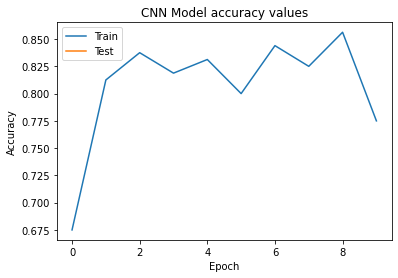

In [22]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [29]:
import cv2
from matplotlib.pyplot import imread
from pylab import *

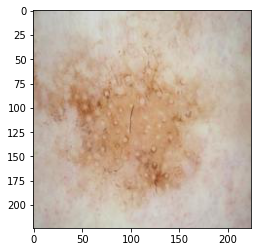

In [30]:
from keras_preprocessing.image import load_img
from keras.applications.imagenet_utils import preprocess_input
import numpy as np
image = load_img('5.jpg',target_size = (224,224))
image = np.array(image)
image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
image = preprocess_input(image)
image
my_image = imread('5.jpg')
imshow(my_image)

In [31]:
yhat = model.predict(image)
yhat

1/1 [==============================] - 1s 818ms/step


array([[0.01510987, 0.98489016]], dtype=float32)

In [34]:
from keras.utils.np_utils import to_categorical
labels123 = to_categorical(np.argmax(yhat, 1), dtype = "int64")

In [35]:
labels123

array([[0, 1]])